# 1.4.9 Contours in OpenCV
## What are contours?

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [8]:
img = cv2.imread('ebc.jpg')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
len(contours)

25

## How to draw the contours?

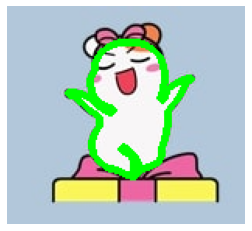

In [9]:
cnt = contours[4]
img = cv2.drawContours(img,[cnt],0,(0,255,0),3)
plt.imshow(img[:,:,::-1])
plt.axis('off')
plt.show()

## Contour Approximation Method
### 1. Moments

In [11]:
import cv2
import numpy as np
img = cv2.imread('ebc.jpg',0)
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]
M = cv2.moments(cnt)
print (M)


{'m00': 121.5, 'm10': 6509.0, 'm01': 12732.5, 'm20': 351323.75, 'm11': 682639.2083333333, 'm02': 1335565.5833333333, 'm30': 19112147.400000002, 'm21': 36879617.333333336, 'm12': 71660732.13333333, 'm03': 140224177.75, 'mu20': 2623.4948559670593, 'mu11': 533.508744855877, 'mu02': 1272.9393004113808, 'mu30': 9933.862675070763, 'mu21': 5750.142258985667, 'mu12': -26.567114577104803, 'mu03': -2194.176556736231, 'nu20': 0.17771646300306929, 'nu11': 0.036140069762798835, 'nu02': 0.08622935530907423, 'nu30': 0.061048845757860855, 'nu21': 0.035337668672984046, 'nu12': -0.00016326898539872705, 'nu03': -0.013484376677952234}


In [12]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

### 2. Contour Area

Contour 영역은 cv2.contourArea()함수나 모멘트(M[ 'm00' ])로부터 얻을 수 있다

In [13]:
area = cv2.contourArea(cnt)

### 3. Contour Perimeter
contour의 호 길이라고도 불린다. cv2.arcLength()함수를 사용하여 찾을 수도 있다. 두 번째 인자는 contour가 닫힌 것(True)인지 아니면 그냥 커브인지 모양을 정해준다.

In [14]:
perimeter = cv2.arcLength(cnt,True)

### 4. Contour Approximation

In [16]:
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

## 5. Convex Hull

In [17]:
hull = cv2.convexHull(cnt)

## 6. Checking Convexity
cv2.isContourConvex()라는 커브가 보록한지 아닌지를 화긴하는 함수가 있다. 이는 True,False로 출력된다

In [19]:
k = cv2.isContourConvex(cnt)

## 7. Bounding Rectangle
### 7.a. Straight Bounding Rectangle

이는 곧은 직사각형으로, 객체의 회전을 신경쓰지 않는다. 그래서 bounding rectangle의 영역이 취소가 되지 않는다.이는 cv2.boundingRect()함수로 찾는다. (x,y)는 rectangle의 좌측 위의 좌표이고, (w,h)는 폭과 높이다.


### 7.b. Rotated Rectangle

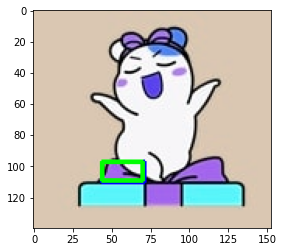

In [32]:
img = cv2.imread('ebc.jpg')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(imgray,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]
x,y,w,h = cv2.boundingRect(cnt)
cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)

rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)

im = cv2.drawContours(img,[box],0,(0,255,0),2)

plt.imshow(im,'gray')
plt.show()

## 8. Minimum Enclosing Circle

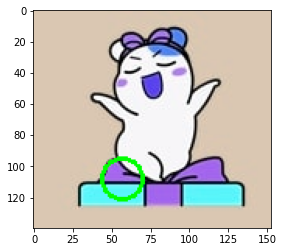

In [34]:
img = cv2.imread('ebc.jpg')

(x,y), radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img = cv2.circle(img,center,radius,(0,255,0),2)

plt.imshow(img)
plt.show()

## 9. Fitting an Ellipse

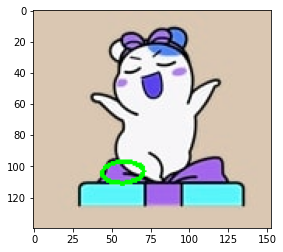

In [37]:
img = cv2.imread('ebc.jpg')

ellipse = cv2.fitEllipse(cnt)
img = cv2.ellipse(img,ellipse,(0,255,0),2)
plt.imshow(img)
plt.show()

## 10. Fitting a Line

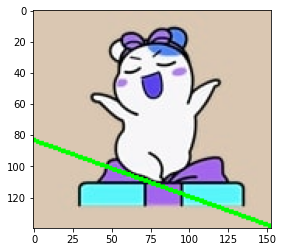

In [39]:
img = cv2.imread('ebc.jpg')

rows,cols = img.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnt,cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
img = cv2.line(img,(cols-1,righty),(0,lefty),(0,255,0),2)

plt.imshow(img)
plt.show()

## Contour Properties
### 1. Aspect Ratio
이 비율은 객체의 bounding rect의 높이에 대한 폭의 비율이다.

In [40]:
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h

### 2. Extent
Extent는 bounding rec영역에 대한 contour영역의 비율이다.

In [41]:
area = cv2.contourArea(cnt)
x,y,w,h = cv2.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area

### 3. Solidity
Solidity는 convex hull 영역에 대한 contour영역의 비율이다.

In [42]:
area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area

### 4. Equivalent Diameter
Equivalent Diameter는 contour영역과 같은 원의 지름이다.

In [43]:
area = cv2.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)

### 5. Orientation
Orientation은 객체가 향하는 각도이다. 다음의 방법은 또한 주축의 길이와 보조축의 길이를 알려준다.

In [44]:
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)

### 6. Mask and Pixel Points
Numpy는 (행,열)형식으로 좌표를 제공하고 OpenCV는(x,y)형식으로 좌표를 제공한다.

In [45]:
mask = np.zeros(imgray.shape,np.uint8)
cv2.drawContours(mask,[cnt],0,255,-1)
pixelpoints = np.transpose(np.nonzero(mask))
#pixelpoints = cv2.findNonZero(mask)

### 7. Maximum Value, Minimum Value and their locations
마스크 이미지를 사용하여 이 파라미터들을 찾을 수 있다.

In [48]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(imgray,mask = mask)

### 8. Mean Color or Mean Intensity
객체의 평균 색을 찾을 수 있다. 또는 흑백 모드에서의 객체의 평균 강도가 될 수 있다. 마스크를 써서 사용할 수 있다.

In [49]:
mean_val = cv2.mean(im,mask = mask)

### 9. Extreme Points
Extreme Points는 객체의 topmost, bottommost,rightmost, leftmost점을 말한다.

In [51]:
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

In [54]:
img = cv2.imread('cube.png')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgray = cv2.GaussianBlur(imgray,(5,5),0)

ret, thr = cv2.threshold(imgray,45,255,cv2.THRESH_BINARY)
thr = cv2.erode(thr, None, iterations=2)
thr = cv2.dilate(thr, None, iterations=2)

contours,_ = cv2.findContours(thr,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[4]

leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

cv2.drawContours(imgray,[cnt],-1,(0,255,255),2)
cv2.circle(img,leftmost,8,(0,0,255),-1)
cv2.circle(img,rightmost,8,(0,255,0),-1)
cv2.circle(img,topmost,8,(255,0,0),-1)
cv2.circle(img,bottommost,8,(255,255,0),-1)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Contours : More Functions
### 1. Convexity Defects

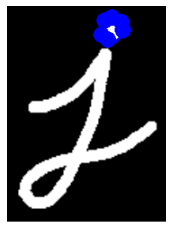

In [2]:
img = cv2.imread('j.png')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

thr = cv2.threshold(imgray,127,255,cv2.THRESH_BINARY)[1]

contours,_ = cv2.findContours(thr,2,1)
cnt = contours[-1]

hull = cv2.convexHull(cnt)
cv2.drawContours(img,[hull],0,(0,0,255),2)

hull = cv2.convexHull(cnt,returnPoints = False)
defects = cv2.convexityDefects(cnt,hull)

for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv2.line(img,start,end,[0,255,0],4)
    cv2.circle(img,far,5,[0,0,255],10)
plt.imshow(img)
plt.axis('off')
plt.show()

### 2. Point Polygon Test

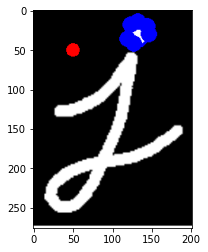

Contour와 점의 거리 : -68.88


In [5]:
dist = cv2.pointPolygonTest(cnt,(50,50),True)
cv2.circle(img,(50,50),3,(255,0,0),10)
plt.imshow(img)
plt.show()
print("Contour와 점의 거리 : {0:.2f}".format(dist))

### 3. Match Shapes

A와 B차이 : 3.89 / A와 C차이 : 4.05e+00 / B와 C차이 : 3.61e-01


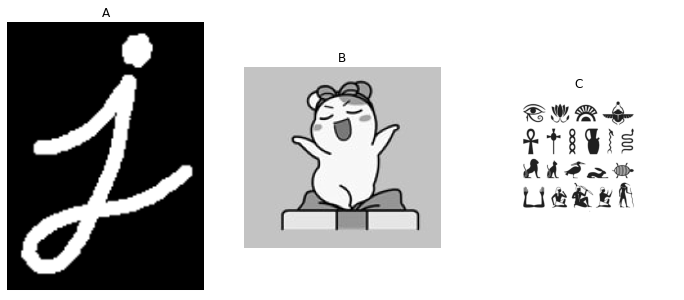

In [7]:
img1 = cv2.imread('j.png',0)
img2 = cv2.imread('ebc.jpg',0)
img3 = cv2.imread('ex.jpg',0)

thr1 = cv2.threshold(img1,127,255,cv2.THRESH_BINARY)[1]
thr2 = cv2.threshold(img2,127,255,cv2.THRESH_BINARY)[1]
thr3 = cv2.threshold(img3,127,255,cv2.THRESH_BINARY)[1]

contours,_ = cv2.findContours(thr1,2,1)
cnt1 = contours[0]
contours2,_ = cv2.findContours(thr2,2,1)
cnt2 = contours2[0]
contours3,_ = cv2.findContours(thr3,2,1)
cnt3 = contours3[0]

retAB = cv2.matchShapes(cnt1,cnt2,1,0.0)
retAC = cv2.matchShapes(cnt1,cnt3,1,0.0)
retBC = cv2.matchShapes(cnt2,cnt3,1,0.0)

plt.figure(figsize=(12,8))
plt.subplot(1,3,1),plt.imshow(img1,'gray')
plt.axis('off'),plt.title('A')
plt.subplot(1,3,2),plt.imshow(img2,'gray')
plt.axis('off'),plt.title('B')
plt.subplot(1,3,3),plt.imshow(img3,'gray')
plt.axis('off'),plt.title('C')

print("A와 B차이 : {0:.2f} / A와 C차이 : {1:.2e} / B와 C차이 : {2:.2e}".format(retAB,retAC,retBC))
plt.show()

## Contour Retrieval Mode
### 1. RETR_LIST
### 2. RETR_EXTERNAL
### 3. RETR_CCOMP
### 4. RETR_TREE